<a href="https://colab.research.google.com/github/IMbye/iAnalyst/blob/main/project_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  GP8R46 NPA Data Science
**Combined J2G246 Data Science, J2HN46 Data Citizenship & J2G646 Machine Learning Assessment**

You have been hired as a Data Scientist by the Scottish Government to assist them with the Covid19 pandemic. Using their daily published statistics you will make predictions on the amount of patients who will need to stay in Intensive Care Units (ICU). Enabling the NHS to allocate their resources effectively.



# Assessment Conditions
This evidence may be produced over the life of the unit, under loosely controlled conditions
(including access to reference materials). As the evidence is produced in loosely controlled
conditions it will be authenticated.

# Learning Outcomes
*J2G246 Data Science*

See [Unit Descriptor](https://www.sqa.org.uk/sqa/files/nq/J2G246.pdf) for further details.

Outcome 3
* Define the required analyses and data models.
* Create a relational data model from external sources of data.
* Perform data transformation to complete, correct and structure data.
* Perform descriptive and predictive analyses on the data.
* Create data visualisations and data dashboards to provide insights.
* Identify potential sources of bias in the analysis.

*J2HN46 Data Citizenship*

See [Unit Descriptor](https://www.sqa.org.uk/sqa/files/nq/J2HN46.pdf) for further details.

Outcome 3

* Extract information from data visualisations and dashboards.
* Evaluate a dataset in terms of its quality including potential bias.
* Interpret data to identify patterns and trends and draw conclusions.
* Create appropriate visualisations from data.
* Communicate findings and make recommendations based on conclusions.

*J2G646 Machine Learning*

See [Unit Descriptor](https://www.sqa.org.uk/sqa/files/nq/J2G646.pdf) for further details.

Outcome 4

* Select and use appropriate analytic tools to examine and choose appropriate features in a given dataset with a view to making predictions
* Select and use a linear regression algorithm to fit a regression model to a given dataset, and interpret its output in terms of performance
* Use an ensemble method to improve the performance of this regression model




# Assessment

To assist you with your assessment your lecturer has distilled the open license relational data from the [Scottish Government](https://www.gov.scot/publications/coronavirus-covid-19-trends-in-daily-data/) into a [Covid19 dataset](https://drive.google.com/drive/folders/1iiZ31W2DuojIdkQVQKw7EpoHxd-aeFtd?usp=share_link). You will need to download this and upload it to your sample_data folder to use in your Colab.





1. Import the Pandas, Numpy and Matplotlib libraries
2. Read the [Covid19 dataset](https://drive.google.com/drive/folders/1iiZ31W2DuojIdkQVQKw7EpoHxd-aeFtd?usp=share_link) from your sample_data folder into a Pandas dataframe

In [72]:
#!git clone https://github.com/IMbye/iAnalyst.git

In [73]:
#from re import U
!pip install -U kaleido

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model



In [75]:
df = pd.read_csv('/content/sample_data/covid19.csv')
df.head()


,date,first_dose,second_dose,icu,hospital,positive_tests
0,11/01/2021,163377.0,2758.0,126,1664,NaN
1,12/01/2021,175942.0,2857.0,133,1717,NaN
2,13/01/2021,191965.0,2990.0,134,1794,NaN
3,14/01/2021,208207.0,3190.0,142,1840,NaN
4,15/01/2021,224840.0,3331.0,141,1881,NaN


3. Using Pandas clean the dataset by removing missing data

In [76]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
448    False
449    False
450    False
451    False
452    False
Length: 453, dtype: bool

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            453 non-null    object 
 1   first_dose      445 non-null    float64
 2   second_dose     445 non-null    float64
 3   icu             453 non-null    int64  
 4   hospital        453 non-null    int64  
 5   positive_tests  75 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 21.4+ KB


In [78]:
df.describe()




,first_dose,second_dose,icu,hospital,positive_tests
count,4.450000e+02,4.450000e+02,453.000000,453.000000,75.000000
mean,3.480783e+06,2.690738e+06,46.675497,832.551876,192.680000
std,1.193378e+06,1.561651e+06,34.644698,617.199739,82.239459
min,1.633770e+05,2.758000e+03,2.000000,58.000000,78.000000
25%,2.817752e+06,1.297664e+06,20.000000,341.000000,134.500000
50%,4.075555e+06,3.541708e+06,40.000000,759.000000,174.000000
75%,4.352430e+06,3.969494e+06,60.000000,1132.000000,230.500000
max,4.451641e+06,4.176494e+06,161.000000,2405.000000,375.000000


In [79]:

x = df["first_dose"].mean()
x = df["second_dose"].mean()
x = df["positive_tests"].mean()
df["first_dose"].fillna(x, inplace = True)
df["second_dose"].fillna(x, inplace = True)
df["positive_tests"].fillna(x, inplace = True)


In [80]:
df.describe()


,first_dose,second_dose,icu,hospital,positive_tests
count,4.530000e+02,4.530000e+02,453.000000,453.000000,453.000000
mean,3.419315e+06,2.643223e+06,46.675497,832.551876,192.680000
std,1.268690e+06,1.587908e+06,34.644698,617.199739,33.275676
min,1.926800e+02,1.926800e+02,2.000000,58.000000,78.000000
25%,2.773770e+06,1.068704e+06,20.000000,341.000000,192.680000
50%,4.061687e+06,3.482188e+06,40.000000,759.000000,192.680000
75%,4.351214e+06,3.965437e+06,60.000000,1132.000000,192.680000
max,4.451641e+06,4.176494e+06,161.000000,2405.000000,375.000000


4. Explore the dataset both statistically and visually looking for useful correlations between 'icu' and other features

In [81]:
df

,date,first_dose,second_dose,icu,hospital,positive_tests
0,11/01/2021,163377.0,2758.0,126,1664,192.68
1,12/01/2021,175942.0,2857.0,133,1717,192.68
2,13/01/2021,191965.0,2990.0,134,1794,192.68
3,14/01/2021,208207.0,3190.0,142,1840,192.68
4,15/01/2021,224840.0,3331.0,141,1881,192.68
...,...,...,...,...,...,...
448,04/04/2022,4362070.0,4095356.0,23,2376,153.00
449,05/04/2022,4364117.0,4095979.0,24,2380,157.00
450,06/04/2022,4365478.0,4096193.0,24,2338,161.00
451,07/04/2022,4367783.0,4096768.0,27,2304,163.00


In [82]:
df.corr()

<ipython-input-82-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,first_dose,second_dose,icu,hospital,positive_tests
first_dose,1.000000,0.943175,-0.472714,-0.111969,-0.004409
second_dose,0.943175,1.000000,-0.279469,0.130165,-0.006909
icu,-0.472714,-0.279469,1.000000,0.512518,0.124517
hospital,-0.111969,0.130165,0.512518,1.000000,0.046312
positive_tests,-0.004409,-0.006909,0.124517,0.046312,1.000000


In [83]:
correlation_matrix = df.corr()

<ipython-input-83-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


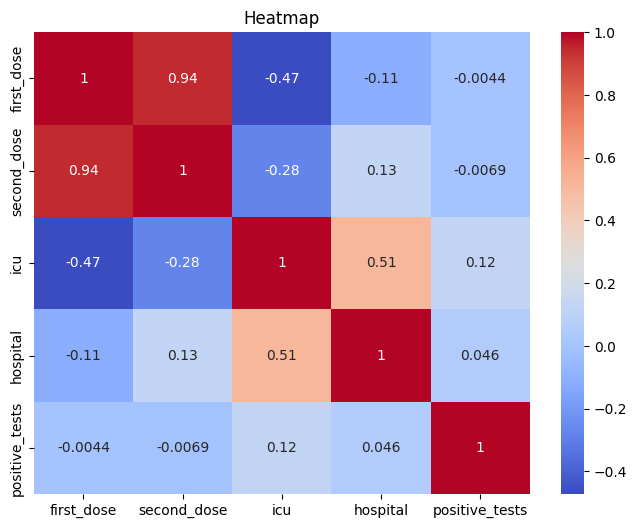

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

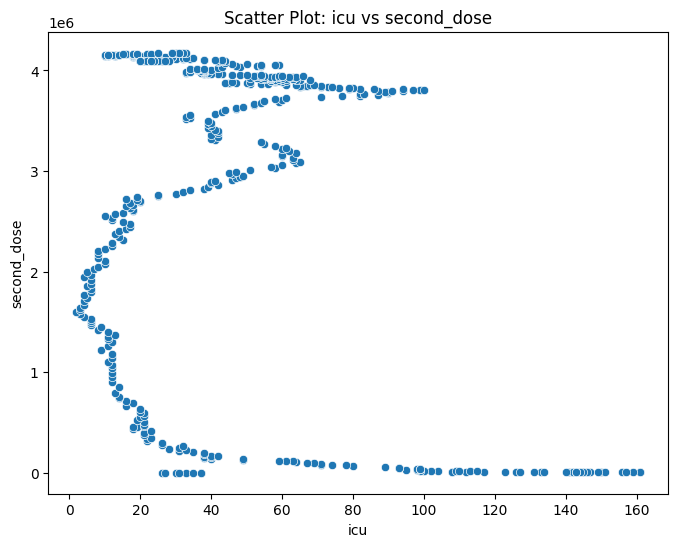

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='icu', y='second_dose', data=df)
plt.title("Scatter Plot: icu vs second_dose")
plt.show()

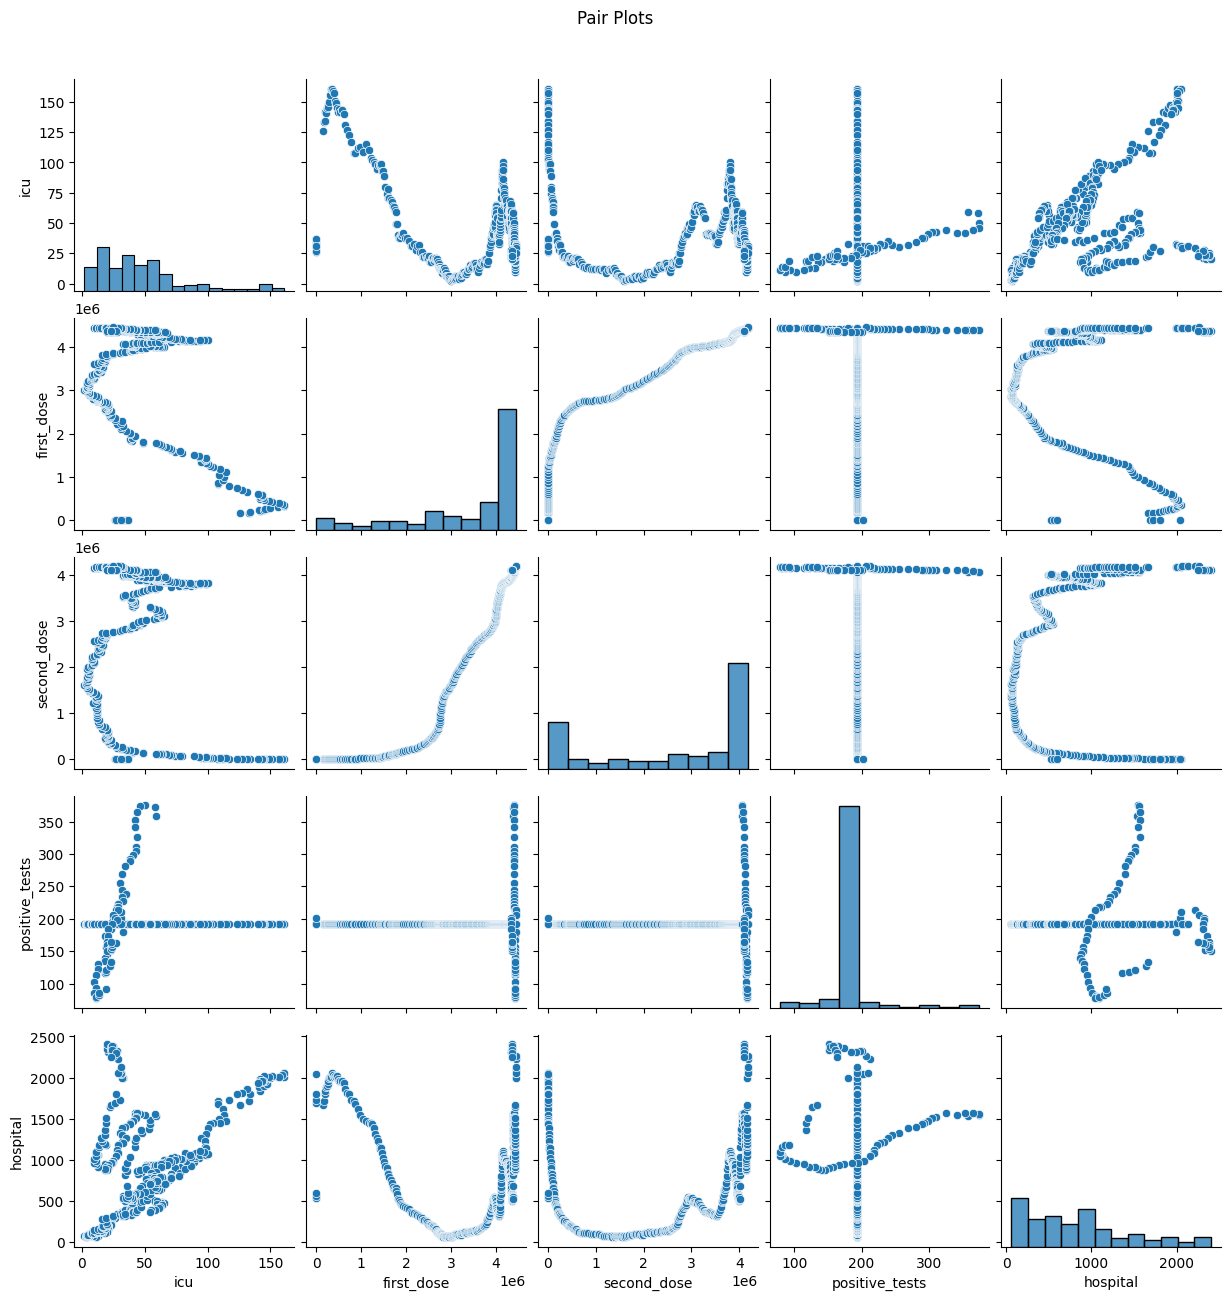

In [86]:
sns.pairplot(df[['icu', 'first_dose', 'second_dose','positive_tests', 'hospital']])
plt.suptitle("Pair Plots", y=1.04)
plt.show()

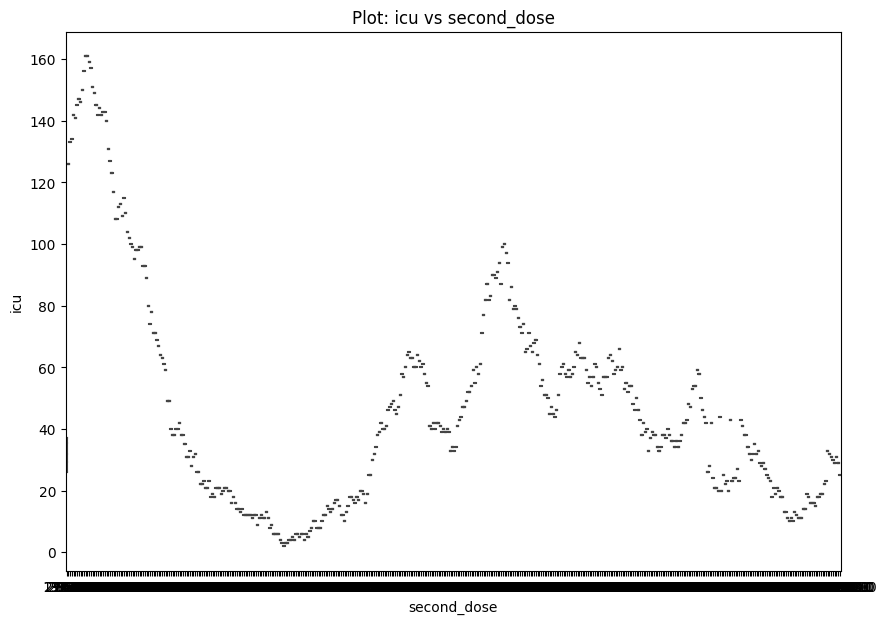

In [87]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='second_dose', y='icu', data=df)
plt.title("Plot: icu vs second_dose")
plt.show()

5. Analyse your findings
* Identify which feature is most correlated with 'icu' and will be useful to base predictions on?
* What possible reasons are there for 'icu' cases dropping compared to 'hosptial' patients for more recent dates?

In [88]:
# icu has a strong negetive correlation first dose (-0.47) and second dose (-0.28).
# second dose has highest correlation coefficient
# Base on the outcome of the correlation figures many people vaccinating drop the icu cases compare to hospital patients, beacause people were not put on ventilators

6. Explain the term data bias and identify an any potential bias in this dataset

Data bias refers to inaccurate, incomplete, or incompatible datasets, failing to represent the entire population. Common biases include gender and racial stereotypes, extrapolating the views of a few individuals to a larger group, and making generalizations. Data bias leads to incorrect results, renders data ineffective for its intended purpose, and contributes to systemic inequality. Data bias can manifest at various levels and in different forms, highlighting the pervasive nature of biases in AI systems.

Data bias in machine learning is a growing concern encompassing various forms of bias, including collection, analysis, and utilization. Biased data yields inaccurate and unreliable results, rendering it ineffective in achieving desired goals and potentially causing harm. For example, biases in facial recognition technologies have led to lower accuracy in identifying black women aged 18-30 compared to other groups, perpetuating societal inequalities.


7. Use the feature you identified above and 'icu' to prepare datasets for a machine learning model. Create a numpy array called 'x' for the identified feature and one called 'y' for 'icu'.

In [89]:
x = df['second_dose'].values.reshape(-1, 1)
y = df['icu'].values


8. Split these x and y numpy arrays into training and testing sets. Use a 90%/10% split.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
ninety_percent = int(np.shape(x)[0]*0.9)

ninety_percent = int(np.shape(x)[0]*0.9)
x_train = x[:ninety_percent]
y_train = y[:ninety_percent]

x_test = x[ninety_percent:]
y_test = y[ninety_percent:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(407, 1)
(407,)
(46, 1)
(46,)


9. Fit the LinearRegression model from SKLearn to the above training set

In [92]:
# Create the model and fit to training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [93]:
model.fit(x_train, y_train)

LinearRegression()

10. Use the LinearRegression model's score() method to statistically measure the performance on both the training and testing sets

In [94]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.05688907366714302
-12.001167017487651


11. Use the LinearRegression model's predict() method and matplotlib to visualise the performance on both the training and testing sets

In [95]:
y_train_pred = model.predict(x_train)

In [96]:
y_test_pred = model.predict(x_test)

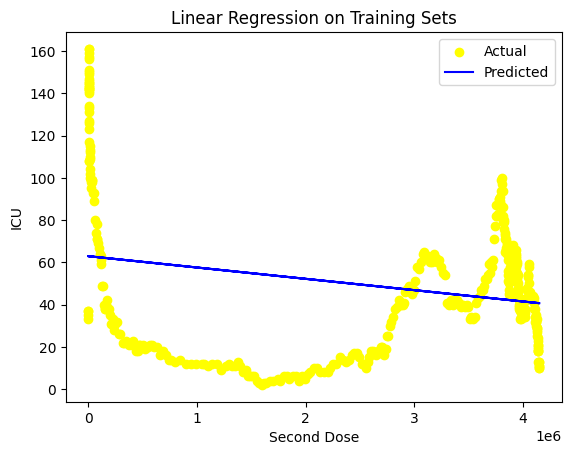

In [97]:
plt.scatter(x_train, y_train, color='yellow', label='Actual')
plt.plot(x_train, y_train_pred, color='blue', label='Predicted')
plt.title('Linear Regression on Training Sets')
plt.xlabel('Second Dose')
plt.ylabel('ICU')
plt.legend()
plt.show()


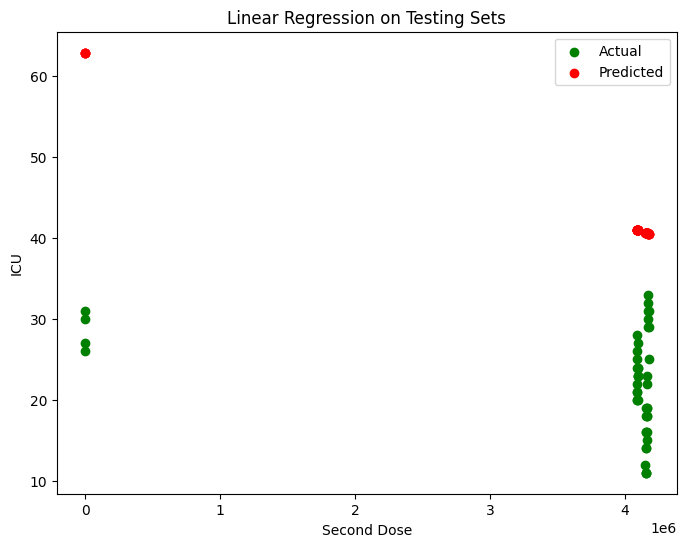

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='green', label='Actual')
plt.scatter(x_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Second Dose')
plt.ylabel('ICU')
plt.title('Linear Regression on Testing Sets')
plt.legend()
plt.show()

12. Use all the features to prepare datasets for a more powerful machine learning model. Create a numpy multi-dimensional array called 'x' for the all the features and again one called 'y' for 'icu'.  

In [99]:
x = df[['first_dose','second_dose','hospital','positive_tests']].values
y = df[['icu']].values

13. Split these x and y numpy arrays into training and testing sets. Use a 90%/10% split again.



In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

14. Fit the powerful RandomForestRegressor model from SKLearn to the above training set

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

<ipython-input-102-1cc828d9d67a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor()

15. Use the RandomForestRegressor model's score() method to statistically measure the performance on both the training and testing sets

In [103]:
from IPython.testing import test
test_score = rf_model.score(x_test, y_test)
train_score = rf_model.score(x_train, y_train)
print(test_score)
print(train_score)

0.9862974645421241
0.9970414321183069


16. Use the RandomForestRegressor model's predict() method and matplotlib to visualise the performance on both the training and testing sets

In [104]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

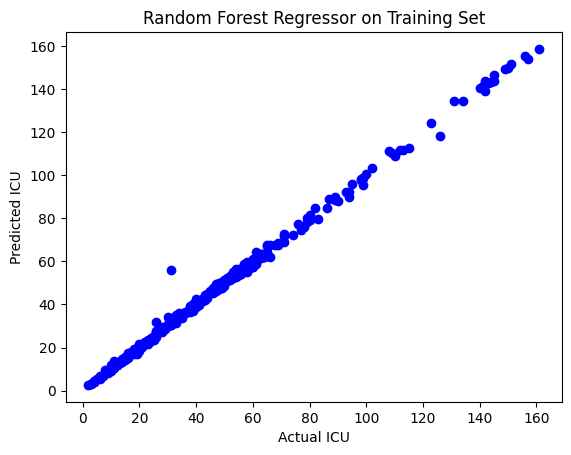

In [105]:
plt.scatter(y_train, y_train_pred, color='blue')
plt.title('Random Forest Regressor on Training Set')
plt.xlabel('Actual ICU')
plt.ylabel('Predicted ICU')
plt.show()

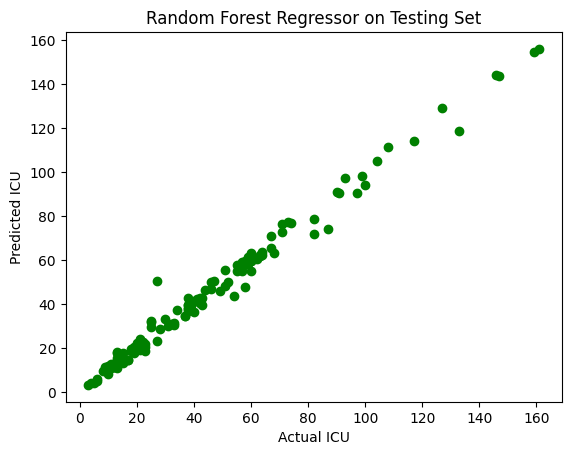

In [106]:
plt.scatter(y_test, y_test_pred, color='green')
plt.title('Random Forest Regressor on Testing Set')
plt.xlabel('Actual ICU')
plt.ylabel('Predicted ICU')
plt.show()


17. Explain the results from the Linear Regression and Random Forest models.
A)  Which had the best the performance on the training set?
B)  Which had the best performance on the test set?
C)  Which model would you use for making 'icu' predictions?
D)  How come?
E)  How could you improve the predictions of the other model?

A)  Which had the best the performance on the training set?
Random Forest Models has the best performance on the training set with the highest  R^2 score on the training set with figure of (0.99) compare to Linear Regression Model with (0.06). The higher the R^2 score, the better the model fits the training data.

B)  Which had the best performance on the test set?
Random Forest Models has the best performance on the testing set with the highest R^2 score on the testing set figure with (0.98) compare to Linear Regression with (-12.00).
This indicates how well the model generalizes to new, unseen data.

C)  Which model would you use for making 'icu' predictions?
The model with the highest R^2 score on the testing set should be preferred for making 'icu' predictions. This indicates that it performs well on data it hasn't seen before.
Therefore, Random Forest will be the Model use for making 'icu' prediction because it is showing the highest figure.

D)  How come?
The testing set performance is a better indicator of how well the model will perform on new, unseen data. A model that generalizes well to new data is more likely to make accurate predictions in real-world scenarios.

E)  How could you improve the predictions of the other model?
If the other model had lower performance on the testing set, you could consider several approaches to improve its predictions:

1) Feature Engineering: Explore and engineer additional features that might provide more relevant information for predicting 'icu' cases.

2) Hyperparameter Tuning: Fine-tune the hyperparameters of the model to find the optimal settings for better performance.

3) Try Different Models: Experiment with different machine learning models to see if a different algorithm might perform better on the given data.

4) Ensemble Methods: Consider using ensemble methods like bagging, boosting, or stacking to combine multiple models for potentially improved predictions.

5) Data Preprocessing: Ensure that the data is preprocessed appropriately, including handling missing values, scaling features, and encoding categorical variables if necessary.

6) Cross-Validation: Use cross-validation techniques to get a more robust estimate of the model's performance and to identify potential issues with overfitting.

# New Section